In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.insert(0,'..')

import matplotlib.pyplot as plt
import os.path
import prepare, prepare_sso, preprocessing
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, precision_score, \
                            classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

import graphviz
from graphviz import Graph

import warnings
warnings.filterwarnings("ignore")

plt.rc('figure', figsize=(16,10))
plt.rc('font', size=14)
pd.set_option('display.max_colwidth', 250)
pd.set_option('display.max_columns', 50)

In [2]:
if os.path.isfile('sso_dict.csv'):
    df_dict = pd.read_csv('sso_dict.csv')
else:
    url_sso_dict = '''https://storage.googleapis.com/sa_saws_data/SAWS_SSO_DataFieldDescription_MM.xlsx'''
    df_dict = pd.read_excel(url_sso_dict)
    df_dict.to_csv('sso_dict.csv', index=False)

In [3]:
df_dict

,Field,Data Description
0,SSO_ID,Internal ID
1,INSPKEY,Not Used
2,SERVNO,Service Req # (internal use only)
3,REPORTDATE,Date Reported
4,SPILL_ADDRESS,Street number of spill
5,SPILL_ST_NAME,Streen name of spill
6,TOTAL_GAL,Total gallons spilled
7,GALSRET,Gallons returned to collection system
8,GAL,Disregard
9,SPILL_START,When SAWS received information about the spill or arrived at the location


In [4]:
# df = acquire_sso.acquire_sso()

In [5]:
# df.head(1)

In [6]:
# df = prepare_sso.prepare_sso_df()
# df.head(1)

In [7]:
# df = prepare.prepare_sso_df()
# print(df.shape[0])
# df.head(1)

In [8]:
# df.columns = ['sso_id','report_date','spill_address_num','spill_st_name',
#  'total_gal','gals_ret','spill_start','spill_stop','hrs','cause',
#  'comments','actions','watershed','unit_id','unit_id2','discharge_to',
#  'discharge_route','council_district','month','year','week',
#  'earz_zone','pipe_diam','pipe_len','pipe_type','inst_year','inches_no',
#  'rainfall_last3','spill_address_full','num_spills_recorded',
#  'num_spills_24mos','prevspill_24mos','unit_type','asset_type',
#  'last_cleaned','response_time','response_dttm','public_notice',
#  'root_cause','hrs_2','gal_2','hrs_3','gal_3','days_since_cleaned']

In [9]:
# df.head(1)

In [10]:
# df.ResponseTime * 60

In [11]:
# df.shape

In [12]:
# df_dict.shape

In [13]:
# df_dict['Data Description'].value_counts()

In [14]:
# unused = ['Disregard','Ignore','Service Req # (internal use only)',
#           'Not Used','Old mapping system reference (internal only)']
# df_dict[df_dict['Data Description'].isin(unused)]

In [15]:
# ready1_dict = df_dict[~df_dict['Data Description'].isin(unused)]
# print(len(ready1_dict))
# ready1_dict

In [16]:
# null_fields = ['SPILL_START_2','SPILL_START_3',
#                'SPILL_STOP_2','SPILL_STOP_3']
# final_dict = ready1_dict[~ready1_dict.Field.isin(null_fields)]\
#                     .reset_index(drop=True)
# len(final_dict)

In [17]:
# final_dict

In [18]:
# features_to_use = list(final_dict.Field)
# len(features_to_use)

In [19]:
# bad_features = list(df.columns[~df.columns.isin(features_to_use)])

In [20]:
# df = df.drop(columns=bad_features)
# df = df.drop(columns = ['TIMEINT','STEPS_TO_PREVENT'])
# df.shape

In [21]:
# string_features = ['SSO_ID','SPILL_ADDRESS','COUNCIL_DISTRICT',]
# for col in string_features:
#     df[col] = df[col].astype(str)
    
# time_features = ['REPORTDATE','SPILL_START','SPILL_STOP',
#                  'ResponseDTTM', 'LASTCLND']
# for col in time_features:
#     df[col] = pd.to_datetime(df[col])
    
# fill_features = ['NUM_SPILLS_24MOS','PREVSPILL_24MOS','HRS_2',
#                 'HRS_3','GAL_2','GAL_3']
# for col in fill_features:
#     df[col] = df[col].fillna(0)
    
# df.Root_Cause = df.Root_Cause.str.strip()

In [22]:
# df['days_since_cleaned'] = (df.SPILL_START - df.LASTCLND).dt.days

In [23]:
# df['country_address'] = df.spill_address_full + \
#                                   ',SAN ANTONIO,Texas,USA'
# df.country_address

In [24]:
# df[['country_address']].head(25)

In [25]:
# for i in range(df.index.max()//5):
#     print([1*i+5, 2*i+5, 3*i + 5])

In [26]:
# lmo = pd.DataFrame()
# lmo['loc'] = ['string','fnish']
# lmo['was'] = [2,3]
# lmo.was[1] = 4
# lmo

In [27]:
# locator = Nominatim(user_agent="myGeocoder")
# geocode = RateLimiter(locator.geocode, min_delay_seconds=.1)
# test2 = pd.Series()

# counter = 10
# for i in range(0, df.index.max(), 10):
#     test = df[['country_address']][i:counter]
#     test['location'] = test['country_address'].apply(geocode)
#     test['zip_code'] = 'None'
#     for t,l in enumerate(test.location):
#         if l is not None:
#             test['zip_code'][counter+t-10] = l.raw['display_name']\
#                                     .split(',')[-2]
#     time.sleep(2)
#     test2 = test2.append(test.zip_code)
#     counter+=10
# test2

### Working

In [28]:
# locator = Nominatim(user_agent="myGeocoder")
# geocode = RateLimiter(locator.geocode, min_delay_seconds=.1, 
#                      max_retries=10, error_wait_seconds=1)
# df['location'] = df['country_address'].apply(geocode)
# df['zip_code'] = 'None'

In [29]:
# for t,l in enumerate(df.location):
#         if l is not None:
#             df['zip_code'][t] = l.raw['display_name']\
#                                     .split(',')[-2]

In [30]:
# df = prepare.prepare_sso_with_zipcodes()
# print(df.shape[0])
# df.head(1)

In [31]:
# df = prepare_sso.prepare_sso_with_zipcodes()
# df.head(1)

In [32]:
# df.age.isna().sum()

In [33]:
# df.age.median()

In [34]:
# plt.figure(figsize=(16,8))
# sns.swarmplot(x="root_cause", y="age", data=df)
# plt.ylabel("Age of Sewer")
# plt.xlabel("Root Cause of SSO Event")
# plt.show()

# Exploration

In [35]:
# df = prepare.get_data()
# # df = preprocessing.get_model_data()
# print(df.shape)
# df.head(1)

In [36]:
# list(df.columns[-75:-50])

In [37]:
# df[df.sso_id==2211].spill_start.dt.year
# df[df.sso_id==2211].inst_year.astype(float)

In [38]:
# df[(df.inst_year=='2011.0') & (df.age==37)]

In [39]:
# df.inst_year[df.age==37].value_counts()

In [40]:
# df.age.value_counts()

In [41]:
# df['unit_type_is_gravity'].sum()

In [42]:
# df.root_cause.isna().sum()

In [43]:
# df.root_cause.value_counts(dropna=False)

In [44]:
# train, test = train_test_split(df, random_state=42, train_size=.8)

In [45]:
# train.zip_code.value_counts().head(5)

In [46]:
# train.isna().sum()

In [47]:
# train.spill_address_full.head(15)

In [48]:
# train.days_since_cleaned.dropna()

In [49]:
# train[train.days_since_cleaned == train.days_since_cleaned.max()]

In [50]:
# features = df.isna().sum() / df.shape[0]
# bad_list = features[features > .4]
# print(len(bad_list))
# bad_list

In [51]:
# train.drop(columns='hours_spilled')\
#     .describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

In [52]:
# len(train.report_date.unique())

In [53]:
# train[train.num_spills_recorded == train.num_spills_recorded.max()]

In [54]:
# train[train.total_gal.isin(list(train.total_gal.nlargest(8)))]

In [55]:
# train.age_binned.dropna().value_counts().sort_index().plot.bar()
# plt.xticks(rotation=45)

# plt.ylabel('Count of binned age')
# plt.xlabel('Binned age')
# plt.title('Binned age of sewers')
# plt.show()

In [56]:
# ax = train.groupby('root_cause').days_since_cleaned.mean()\
#     .sort_values(ascending=False).dropna().plot.barh()
# ax.set_ylabel('')
# ax.set_xlabel('Average days since cleaning')
# plt.title('Average days since cleaning by root cause')
# plt.show()

In [57]:
# ax = train.groupby('root_cause').total_gal.median()\
#     .sort_values(ascending=False).dropna().plot.barh()
# ax.set_ylabel('')
# ax.set_xlabel('Median gallons spilled')
# plt.title('Median gallons spilled by root cause')
# plt.show()

In [58]:
# train['total_gal_binned'].value_counts().sort_index().plot.bar()
# plt.xticks(rotation=45)

In [59]:
# train[train.days_since_cleaned == train.days_since_cleaned.max()]

In [60]:
# train[train.inst_year == train.inst_year.max()].shape

In [61]:
# df.zip_code.value_counts()

In [62]:
# df.inches_no.isna().sum()

In [63]:
# df[df.age=='unknown'].shape

In [64]:
# df.age = df.age.replace('unknown', 0)
# df.age = df.age.replace(0, df.age.median())

In [65]:
# df.age

In [66]:
# df.days_since_cleaned.median()

In [67]:
# df[df.zip_code=='78245'].root_cause.value_counts()

In [68]:
# root_cause_zipcode = df.groupby('zip_code').root_cause.apply(
#         lambda x: x.value_counts().head(1))
# # root_cause_zipcode.to_csv('root_cause_zipcode.csv')
# root_cause_zipcode.sort_values().tail(40)

In [69]:
# train.pipe_type.value_counts()

In [70]:
# train.groupby('age_binned').total_gal.median()\
#     .sort_values(ascending=False)

In [71]:
# train.root_cause.value_counts()

In [72]:
# train.head(1)

In [73]:
# train[train.root_cause == 'other']['cause'].value_counts()

In [74]:
# top_worst_spills = train[train.total_gal.isin(
#                             train.total_gal.nlargest(15))]
# top_worst_spills[['age_binned','total_gal']]\
#     .sort_values('total_gal', ascending=False)

In [75]:
# top_bins = top_worst_spills.sort_values(by='total_gal', 
#                         ).age_binned.value_counts()
# top_bins[top_bins>0]

In [76]:
# train.groupby('age_binned').total_gal.mean()\
#             .dropna().sort_values().tail(6)

In [77]:
# ax = train.groupby('age_binned').total_gal.median()\
#             .dropna().sort_values().tail(6).plot.barh()
# xlabels = ['{:,.1f}'.format(x) +'K' 
#                    for x in ax.get_xticks()/1000]
# ax.set_xticklabels(xlabels)
# ax.set_xlabel('Median gallons spilled')
# ax.set_ylabel('Age binned')
# plt.title('Median gallons spilled by binned age')
# plt.show()

In [78]:
# ax = train.groupby('age_binned').total_gal.mean()\
#             .dropna().sort_values().tail(6).plot.barh()
# xlabels = ['{:,.0f}'.format(x) +'K' 
#                    for x in ax.get_xticks()/1000]
# ax.set_xticklabels(xlabels)
# ax.set_xlabel('Average gallons spilled')
# ax.set_ylabel('Age binned')
# plt.title('Average gallons spilled by binned age')
# plt.show()

In [79]:
# num_spills_recorded, num_spills_24mos

In [80]:
# sns.barplot(train.num_spills_recorded, train.root_cause)
# plt.xlabel('Average number of spills')
# plt.ylabel('')
# plt.title('Average number of spill recorded by root cause of event')
# plt.show()

In [81]:
# train.groupby('root_cause').num_spills_24mos.sum()
# df.root_cause.value_counts()

In [82]:
# sns.swarmplot(train.root_cause, train.num_spills_24mos)
# plt.xlabel('Root cause')
# plt.ylabel('Number of spills')
# plt.title(
# 'Number of spills in last 24 months by root cause of event')
# plt.show()

In [83]:
# sns.barplot(train.num_spills_24mos, train.root_cause)
# plt.xlabel('Average number of spills')
# plt.ylabel('')
# plt.title(
# 'Average number of spills in last 24 months by root cause of event')
# plt.show()

In [84]:
# df.to_csv('cleaned_df.csv')

## Make data useable for modeling

In [85]:
# list(df.columns)

In [86]:
# df.inst_year = df.inst_year[df.inst_year!='unknown']

In [87]:
# df.last_cleaned.value_counts()

In [88]:
# unwanted = ['spill_st_name','comments','actions','discharge_to',
#            'discharge_route','spill_address_full','prevspill_24mos',
#            'last_cleaned','country_address','location']
# categorical_columns = [col for col in list(
#                 df.dtypes[df.dtypes=='O'].index) 
#                  if col not in unwanted]

In [89]:
# columns_to_drop_from_model = [
#     "sso_id","report_date","spill_address_num","spill_st_name",
#     "spill_stop","spill_start","cause","comments","actions",
#     "month","year","week","spill_address_full","last_cleaned",
#     "response_dttm","prevspill_24mos","public_notice",
#     "country_address","location","inches_no","rainfall_last3",
#     "unit_id","unit_id2","zip_code","discharge_to","discharge_route",
#     "council_district","hours_spilled","hrs","gals_ret",
#     "response_time"
# ]

# df2 = df.copy().drop(columns=columns_to_drop_from_model)
# print(df2.shape)
# df2.head(1)

In [90]:
# categorical_columns = [
#     "watershed",
#     "earz_zone",
#     "pipe_type",
#     "inst_year",
#     "unit_type",
#     "asset_type",
#     "age_binned",
#     "total_gal_binned"
    
# ]

# for column in categorical_columns:
#     if is_numeric_dtype(df2[f"{column}"]):
#         values = df2[f"{column}"].unique()
#         for value in values:
#             df2[f"{column}_is_{value}"]=(df2[f"{column}"] == value)\
#                     .astype(int)
#         df2 = df2.drop(columns=column)
#     elif is_string_dtype(df2[f"{column}"]):
#         values = df2[f"{column}"].astype(str).str.lower().unique()
#         for value in values:
#             df2[f"{column}_is_{value}"]=(df2[f"{column}"] == value)\
#                 .astype(int)
#         df2 = df2.drop(columns=column)

In [91]:
# df2.head(1)

In [92]:
# df2.root_cause.value_counts(dropna=False)

In [93]:
# other_causes = ['vandalism','roots','i/i','by pass pump leak']
# for cause in other_causes:
#     df2.root_cause = df2.root_cause.replace(cause, 'other')
# df2.root_cause.value_counts()

In [94]:
df = preprocessing.get_model_data()
df.head(1)

,total_gal,pipe_diam,pipe_len,num_spills_recorded,num_spills_24mos,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,age,precipitation,snowfall,snow_depth,avg_temp,max_temp,min_temp,foggy,heavy_fog,thunder,hail,blowing_snow,rain,precipitation_rolling_7,...,"age_binned_is_(10.0, 15.0]","age_binned_is_(55.0, 60.0]",age_binned_is_nan,"age_binned_is_(15.0, 20.0]","age_binned_is_(45.0, 50.0]","age_binned_is_(50.0, 55.0]","age_binned_is_(70.0, 75.0]","age_binned_is_(40.0, 45.0]","age_binned_is_(90.0, 95.0]","age_binned_is_(115.0, 120.0]","age_binned_is_(105.0, 110.0]","age_binned_is_(85.0, 90.0]","age_binned_is_(95.0, 100.0]","age_binned_is_(75.0, 80.0]","age_binned_is_(100.0, 105.0]","age_binned_is_(80.0, 85.0]","age_binned_is_(110.0, 115.0]","total_gal_binned_is_(1000, 5000]","total_gal_binned_is_(50, 250]","total_gal_binned_is_(15, 50]","total_gal_binned_is_(250, 1000]","total_gal_binned_is_(5000, 50000]","total_gal_binned_is_(50000, 2000000]","total_gal_binned_is_(2000000, 13304550]","total_gal_binned_is_(0, 15]"
0,2100,8.0,16.55,1,1.0,other,0.0,0.0,0.0,0.0,164.0,22.0,0.0,0.0,0.0,69.0,79,60,1,1,0,0,0,0,0.004286,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [96]:
df.isna().sum()[df.isna().sum() > 0]

age    238
dtype: int64

In [97]:
df = df.dropna()

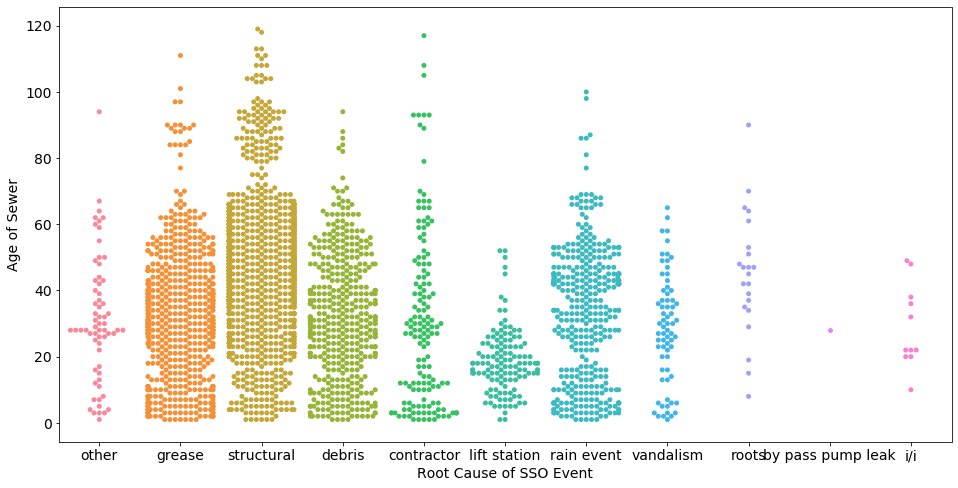

In [113]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="root_cause", y="age", data=df)
plt.ylabel("Age of Sewer")
plt.xlabel("Root Cause of SSO Event")
plt.show()

In [98]:
# df2.age.isna().sum()

In [99]:
# df2.isna().sum()[df2.isna().sum() > 0]

In [100]:
# df2.shape

In [102]:
X = df.drop(columns='root_cause')
y = df.root_cause

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=.8, random_state=13,)
X_train, X_val, y_train, y_val = \
    train_test_split(X_train, y_train, train_size=.75,
                     random_state=13,)

### Decision Tree

In [103]:
X_train.isna().sum()[X_train.isna().sum() > 0]

Series([], dtype: int64)

In [104]:
params = {'max_depth': range(1,13), 'min_samples_leaf': range(1,7),
          'criterion': ['gini', 'entropy']}
model = DecisionTreeClassifier(random_state=13)
grid = GridSearchCV(model, params, cv=None, iid=True)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4}


In [105]:
results = grid.cv_results_
for score, p in zip(results['mean_test_score'], results['params']):
    p['score'] = score
pd.DataFrame(results['params']).sort_values('score').tail(5)

,criterion,max_depth,min_samples_leaf,score
19,gini,4,2,0.531409
20,gini,4,3,0.531975
21,gini,4,4,0.532541
23,gini,4,6,0.532541
22,gini,4,5,0.532541


In [127]:
tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=1,
                              criterion='gini',random_state=13)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_train)
print(f'Accuracy Score on Train: \
    {tree.score(X_train, y_train) * 100:.2f}%')
print(f'Accuracy Score on Val: \
    {tree.score(X_val, y_val) * 100:.2f}%')

Accuracy Score on Train:     58.35%
Accuracy Score on Val:     53.82%


In [110]:
pd.DataFrame(classification_report(y_train, y_pred,
                                   output_dict=True)).T

,precision,recall,f1-score,support
by pass pump leak,0.000000,0.000000,0.000000,1.000000
contractor,0.000000,0.000000,0.000000,89.000000
debris,0.473684,0.032609,0.061017,276.000000
grease,0.328358,0.617978,0.428850,356.000000
i/i,0.000000,0.000000,0.000000,8.000000
lift station,0.952381,0.857143,0.902256,70.000000
other,0.000000,0.000000,0.000000,32.000000
rain event,0.723183,0.896996,0.800766,233.000000
roots,0.000000,0.000000,0.000000,16.000000
structural,0.648760,0.731366,0.687591,644.000000


In [112]:
dot_data = export_graphviz(tree, 
                           feature_names= X_train.columns.tolist(),
                           class_names= y_train.value_counts(normalize=True).index.sort_values().tolist(),
                           out_file=None) 
graph = graphviz.Source(dot_data) 

graph.render('saws-prediction-tree', view=True)

'saws-prediction-tree.pdf'

68% on 742 points

80% on 241 points

88% on 84  points

39% on 367 points

00% on 266 points

In [ ]:
print(pd.Series([.68,.80,.88]).mean())
print((742+241+84)/1909)

In [ ]:
print(pd.Series([.68,.80,.88,.39]).mean())
print((742+241+84+367)/1909)

In [ ]:
print(pd.Series([.68,.80,.88,.39,.00]).mean())
print((742+241+84+367+266)/1909)

In [ ]:
print(f'Accuracy Score on Test: \
    {tree.score(X_test, y_test) * 100:.2f}%')

### Logistic Regression

In [ ]:
model = LogisticRegression(random_state = 13).fit(X_train, y_train)
y_pred = model.predict(X_train)
y_pred_prob = model.predict_proba(X_train)

print(f'Accuracy Score on Train: \
    {model.score(X_train, y_train) * 100:.2f}%')
print(f'Accuracy Score on Val: \
    {model.score(X_val, y_val) * 100:.2f}%')

In [ ]:
pd.DataFrame(classification_report(y_train, y_pred,
                                   output_dict=True)).T

### Random Forest

In [ ]:
params = {'max_depth': range(1,13), 'min_samples_leaf': range(1,4),}
          #'criterion': ['gini', 'entropy']}
model = RandomForestClassifier(random_state=13)
grid = GridSearchCV(model, params, cv=None, iid=True)
grid.fit(X_train, y_train)
print(grid.best_params_)

In [ ]:
results = grid.cv_results_
for score, p in zip(results['mean_test_score'], results['params']):
    p['score'] = score
pd.DataFrame(results['params']).sort_values('score').tail(5)

In [ ]:
# forest = RandomForestClassifier(random_state=42, 
#     min_samples_leaf=1, max_depth=10, 
#     criterion='entropy').fit(X_train, y_train)
forest = RandomForestClassifier(random_state=13, min_samples_leaf=2,
                               max_depth=8).fit(X_train, y_train)
y_pred = forest.predict(X_train)
print(f'Accuracy Score on Train: \
    {forest.score(X_train, y_train) * 100:.2f}%')
print(f'Accuracy Score on Val: \
    {forest.score(X_val, y_val) * 100:.2f}%')

In [ ]:
pd.DataFrame(classification_report(y_train, y_pred,
                                   output_dict=True)).T

### KNeighbors Classifier

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), 
                      columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), 
                        columns=X_val.columns, index=X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), 
                        columns=X_test.columns, index=X_test.index)

In [ ]:
# params = {'n_neighbors': range(1,13), 'p': range(1,6),}
# #           'weights': ['uniform', 'distance']}
# model = KNeighborsClassifier()
# grid = GridSearchCV(model, params, cv=4, iid=True)
# grid.fit(X_train_scaled, y_train)
# print(grid.best_params_)

In [ ]:
# results = grid.cv_results_
# for score, p in zip(results['mean_test_score'], results['params']):
#     p['score'] = score
# pd.DataFrame(results['params']).sort_values('score').tail(5)

In [ ]:
knmodel = KNeighborsClassifier(n_neighbors=12, p=1, 
                ).fit(X_train_scaled, y_train)
y_pred = knmodel.predict(X_train_scaled)

print(f'Accuracy Score on Train: \
    {knmodel.score(X_train_scaled, y_train) * 100:.2f}%')
print(f'Accuracy Score on Val: \
    {knmodel.score(X_val_scaled, y_val) * 100:.2f}%')

In [ ]:
pd.DataFrame(classification_report(y_train, y_pred,
                                   output_dict=True)).T

68.2% on 742

80.0% on 241

65.7% on 84

40.7% on 367

In [ ]:
print(pd.Series([.682,.80,.657,.407]).mean())
print((742+241+84+367)/1909)